# House Price Prediction with Machine Learning in Python

# 1. Background

## 1.1 Introduction

The real estate market as well as house price fluctuations are always a topic of interest to many people. There are many factors that affect house prices such as the economy, interest rates, house characteristics, etc. In this project, let's find out which elements are most strongly related to home sales prices in King County between May 2014 and May 2015, and then predict prices using machine learning techniques.

## 1.2 Objectives

The objective of this project is to gain insights into the main housing attributes influencing home sales prices in King County, Washington State, USA between May 2014 - May 2015, and predict house prices using different linear regression algorithms. Through the use of EDA techniques and regression analysis methods (OLS, Ridge, Lasso, Bayesian, ElasticNet), I am looking forward to uncovering valuable findings about the following:
- Exploring the relationships between House Sales Price and various Property Characteristics  
- Discovering the correlation between the Prediction Target (Price) and Other Features (Predictors)
- Conducting a multicollinearity tests among the predictors
- Verifying the presence of outliers and linearity
- Creating predictive models and Evaluating their performance
- Extracting specific variables which can be used to recommend to homeowners in King County on how to increase their homes values

## 1.3 Algorithms Selection

### Why Linear Regression?

Linear regression is the most commonly used method of predictive analysis. It uses linear relationships between a dependent variable (target) and independent variables (predictors) to predict the future of the target.

There are several reasons for adopting this method:
- __Interpretability:__ Linear regression models are straightforward to interpret. The coefficients associated with each predictor provide insights into the relationship between the predictors and the target variable. This interpretability is valuable for understanding the impact of different factors on the outcome and the statistical significance of the predictors for the target variable.
- __Simplicity:__ Linear regression is a simple, easy to implement model that can be quickly trained and evaluated. It doesn't require complex computations or tuning of hyperparameters like some other machine learning algorithms. This simplicity can be advantageous, especially when the relationship between the predictors and the outcome is relatively linear and well-understood.
- __Predictive Performance and Wide Applicability:__ Linear regression models can perform well in many real-world scenarios. They are applicable across a wide range of domains and industries, making it a versatile modeling technique.

### Linear Regression Algorithms

To predict the house sales prices, we are going to use the following linear regression algorithms, with the aim of comparing their performance for regression analysis:
Ordinal Least Square (OLS), Ridge, Lasso, Bayesian, and ElasticNet.


## 1.4 Data Documentation

### Dataset

The dataset was obtained from Kaggle. As mentioned previously, it consists of historic data of houses sold in King County between May 2014 to May 2015:
- id: Unique identifier for a house
- date: Date of the house sale
- price: Prediction target
- bedrooms: Number of Bedrooms
- bathrooms: Number of Bathrooms
- sqft_living: Square footage of the living area
- sqft_lot: Square footage of the lot
- floors: Total floors (levels)
- waterfront: House which has a view to a waterfront
- view: View level
- condition: How good the condition is: 1 indicates worn out property and 5 excellent
- grade: Overall grade given to the housing unit, based on King County grading system: 1 poor and 13 excellent
- sqft_above: Square footage of Above Ground Level
- sqft_basement: Square footage of Basement
- yr_built: Year Built
- yr_renovated: Year when the house was renovated
- zipcode: Zipcode
- lat: Latitude coordinate
- long: Longitude coordinate
- sqft_living15: Square footage of the living area in 2015 (implies some renovations)
- sqft_lot15: Square footage of the lot in 2015 (implies some renovations)

### Ethics of Data Source

This data was published/released under CC0: Public Domain (Creative Commons Public Domain Dedication). This license explicitly grant permission for public use and redistribution.

## 1.5 Table of Contents

(Explore sections directly by clicking on their names below)

- __[Setting Up](#2.-Setting-Up):__ Import libraries
- __[Data Pre-Processing](#3.-Data-Pre-Processing)__
    - [Data Cleaning](#Data-Cleaning)
    - [Data Encoding](#Data-Encoding)
- __[Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)__
    - [Data Visualizations](#4.1-Data-Visualizations)
    - [Outliers and Linearity](#4.2-Outliers-and-Linearity)
    - [Correlation and Multicollinearity](#4.3-Correlation-and-Multicollinearity)
    - [Data Scaling](#4.4-Data-Scaling)
- __[Feature Engineering](#5.-Feature-Engineering):__ Feature Selection and Data Split
- __[Modeling](#6.-Modeling):__ OLS, Ridge, Lasso, Bayesian, ElasticNet
- __[Model Evaluation](#7.-Model-Evaluation)__
    - [Explained Variance Score](#7.1-Explained-Variance-Score)
    - [R-Squared](#7.2-R-Squared)
- __[Conclusion](#8.-Conclusion)__
    - [Project Limitations](#Project-Limitations)
    - [Project Extension Ideas](#Project-Extension-Ideas)

----

# 2. Setting Up

[Back to Top](#1.5-Table-of-Contents)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

import warnings
warnings.simplefilter(action="ignore", category=Warning)

from termcolor import colored as cl # text customization

from scipy import stats
from scipy.stats import norm, skew

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2

In [2]:
# Import dataset + Parse date column
df = pd.read_csv('data/kc_house_data.csv', parse_dates=["date"])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


----

# 3. Data Pre-Processing

## Data Cleaning

[Back to Top](#1.5-Table-of-Contents)

First, I check if there is any null or NaN value in the dataframe and identify their source, if present, to decide whether or not to replace the missing data or drop the affected rows.

Next, I verify the presence of duplicate house IDs, which can be interpreted as resold properties.

Then, I check the data types of the entire dataset to see if any columns are in the wrong format. I validate if there are any other variables besides Price, Latitude and Longitude that also have float data type, and determine if they need to be converted to integer.

As the result below, the following columns have float values:
- Floors: might represent partial floors or different levels within a single floor, such as a split-level design where certain areas of the house are slightly elevated or lowered relative to others.
- Bathrooms: could represent partial bathrooms (a full bathroom typically includes a toilet, sink, bathtub, and shower)

Finally, I add a House Age variable that calculates the number of years between when the house was built (Yr_built) and when it was sold (Date). This factor can have a great impact of the house price.

I notice that the minimum value of house age is -1, which could be interpreted as either the house was pre-sold, or there was an error during the information registration. Since there are only 12 houses with house age < 0 out of a total of 21613 rows, I remove these rows to avoid data noise.

In [3]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [4]:
# Check number of NaN values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Check duplicate house IDs (can be considered as resold properties)
df[df.duplicated() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
# Check data types
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [7]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [8]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
# Calculate house age at the time of sale
# House Age = Year of Sale - Year of Construction
age_of_house = [df['date'][index].year - df['yr_built'][index] for index in range(df.shape[0])]

df['house_age'] = age_of_house

In [10]:
# Calculate min, mean, and max of House Age values
df['house_age'].agg({'min','max','mean'})

max     115.000000
min      -1.000000
mean     43.317818
Name: house_age, dtype: float64

In [11]:
# Number of house age < 0
len(df[df.house_age < 0])

12

In [12]:
df.drop(df[df.house_age < 0].index , inplace =True)
df.reset_index(inplace = True , drop =True)

## Data Encoding

[Back to Top](#1.5-Table-of-Contents)

First, we check which columns contain value 0 and interpret them to see if these rows need to be removed. As shown below, the columns containing 0 are: Bedrooms, Bathrooms, Waterfront, View, Sqft_Basement, and Year_Renovated.
- Bedrooms/Bathrooms: houses without bedroom / bathroom
- Waterfront: houses without waterfront view
- View: houses without view
- Sqft_Basement: houses without basement level
- Year_Renovated: either the information about the last renovation is not available, or the house was never been renovated.

Then we look at the percentage of houses with Year_Renovated value = 0. Since 95.77% of houses have Year_Renovated = 0, we will check the correlation between year of renovation and house price. If there is no clear correlation, we will drop the Year_Renovated column and replace it with another column using data encoding.

As there is no association between Year_Renovated and Price, now we will perform data encoding using the data binarization technique: create a new variable Renovated by converting Year_Renovated column from numerical to binary format (0 for not renovated, 1 for renovated). This simplifies data presentation, and can be used for later analysis.

In [13]:
# Check columns which contain 0 + Output columns' location (id column's index = 0)
[i for i, c in enumerate(df.columns) if 0 in df[c].values]
# Columns containing 0: bedrooms, bathrooms, waterfront, view, sqft_basement, yr_renovated


[3, 4, 8, 9, 13, 15, 21]

In [14]:
# Percentage of value 0 in Yr_renovated column
(df.yr_renovated.value_counts(normalize = True)* 100).head()


0       95.768714
2014     0.421277
2013     0.171288
2003     0.166659
2005     0.162030
Name: yr_renovated, dtype: float64

Correlation between yr_renovated and price is 0.1264164616116287


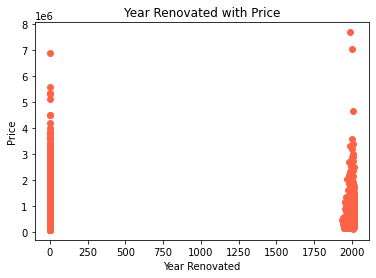

In [15]:
# Check correlation between Year_Renovated and Price
print("Correlation between yr_renovated and price is {}".format(df['yr_renovated'].corr(df['price'])))
plt.scatter(x = df.yr_renovated ,y = df.price, color = 'tomato')
plt.title("Year Renovated with Price")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

In [16]:
# Define function to create column with value 1 if renovated, 0 if not renovated.
# To illustrate relationship between renovation and price later
def renovation(row):
    if row['yr_renovated'] > 0:
        val = 1
    else:
        val = 0
    return val

df['renovated'] = df.apply(renovation, axis=1)

In [17]:
df.drop('yr_renovated',axis = 1 , inplace = True)

----

# 4. Exploratory Data Analysis

## 4.1 Data Visualizations

[Back to Top](#1.5-Table-of-Contents)

### House Price Distribution by Renovated

First, let's look at the house price distribution by view and by whether it was renovated or not.

Text(0.5, 1.0, 'House Price Distribution by Renovated')

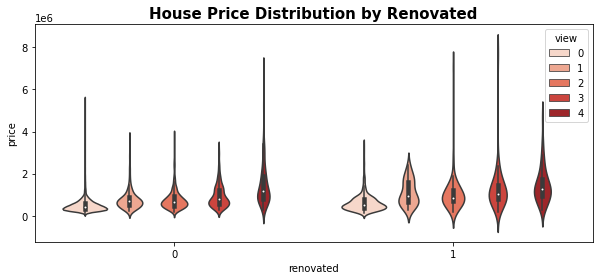

In [18]:
plt.figure(figsize = (10,4))
sns.violinplot(data = df,x = 'renovated' ,y ='price', hue='view', palette = sns.color_palette('Reds', n_colors = 5))
plt.title('House Price Distribution by Renovated', fontsize = 15, fontweight='bold')

As shown in the violin plot above, the renovated side has a higher overall sales price, especially in properties with better view.

### House Price Distribution

Next, we see that the house price (target feature) distribution is right-skewed. There are very few houses priced over 1 million, most house prices are around 200-600K.

Text(0.5, 1.0, 'House Price Distribution')

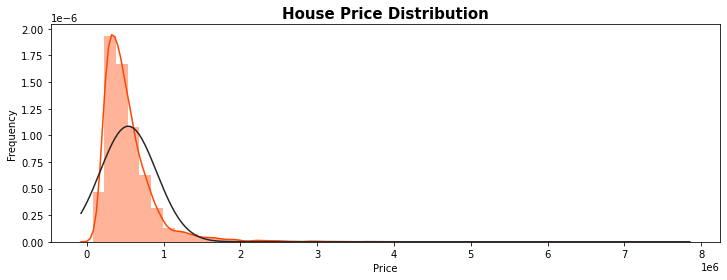

In [19]:
plt.figure(figsize = (12,4))
sns.distplot(df.price,color ='orangered', fit=norm)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('House Price Distribution', fontsize = 15, fontweight='bold')


### House Price Distribution by Living / Above Sqft

Now we will look at House Price by Sqft_Living and Sqft_Above.

As illustrated in the 2 plots below, the sales price greatly depends on living space and above ground level square footage. This is understandable because the market places a high value on usable properties, and living space is a good indicator to determine the usability level of a house.

Houses with better views tend to have higher prices.

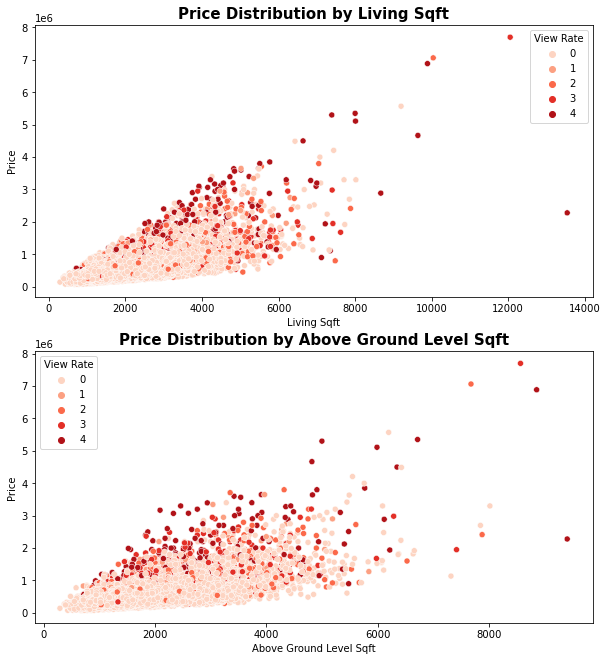

In [20]:
plt.figure(figsize =(10,11))

plt.subplot(2,1,1)
sns.scatterplot(data =df,x = 'sqft_living',y= 'price', hue = 'view', palette = sns.color_palette('Reds', n_colors = 5))
plt.title("Price Distribution by Living Sqft", fontsize = 15, fontweight='bold')
plt.xlabel('Living Sqft')
plt.ylabel('Price')
plt.legend(title = 'View Rate')

plt.subplot(2,1,2)
sns.scatterplot(data =df,x = 'sqft_above',y= 'price', hue = 'view', palette = sns.color_palette('Reds', n_colors = 5))
plt.title("Price Distribution by Above Ground Level Sqft", fontsize = 15, fontweight='bold')
plt.xlabel('Above Ground Level Sqft')
plt.ylabel('Price')
plt.legend(title = 'View Rate')


### House Sales By Month & By Week Day

It can be seen that most buying and selling transactions take place on weekdays. This makes sense, given that real estate agencies, banks, and other involved parties typically operate during weekdays. Many legal and administrative tasks, including property inspections, are also conducted during the week.

The month with highest sales volume is May, which can be explained by the fact that the data was taken for the period from May 2014 to May 2015 (2 times for May). In addition, the months with peak home sales are June, July and August. This is also the busiest moving times of the year according to studies on seasonality in real estate [[1]](#References): both because the weather is nice, and it is during school breaks (when families have more time to move and get ready for a fresh start).

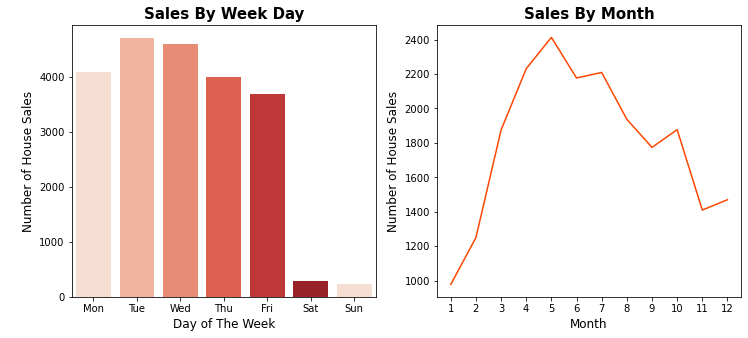

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (12,5), sharey = False)
sales_by_day = df['date'].dt.dayofweek.value_counts()
sns.barplot(ax = axes[0], x = sales_by_day.index.values, y = sales_by_day, palette = sns.color_palette('Reds'))
axes[0].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[0].set_xlabel('Day of The Week', fontsize = 12)
axes[0].set_ylabel('\nNumber of House Sales', fontsize = 12)
axes[0].set_title("Sales By Week Day", fontsize = 15, fontweight='bold')

sales_by_month = df['date'].dt.month.value_counts().sort_index()
sns.lineplot(ax = axes[1], x = sales_by_month.index.values, y = sales_by_month, color = 'orangered')
axes[1].set(xticks = [1,2,3,4,5,6,7,8,9,10,11,12])
axes[1].set_xlabel('Month', fontsize = 12)
axes[1].set_ylabel('\nNumber of House Sales', fontsize = 12)
axes[1].set_title("Sales By Month", fontsize = 15, fontweight='bold')

plt.show()

### House Price By House Age

It is noticeable that house age does not affect sales price, but view does. Houses with desired aesthetics views usually have higher prices. This corresponds to a real estate research company's analysis of house prices in Seattle [[2]](#References) (same location as the data in this project): the possible increase in house prices from 5 to over 100% depends on the types of views (like unobstructed ocean view, unobstructed cityscape, or partially obstructed water view, etc.)

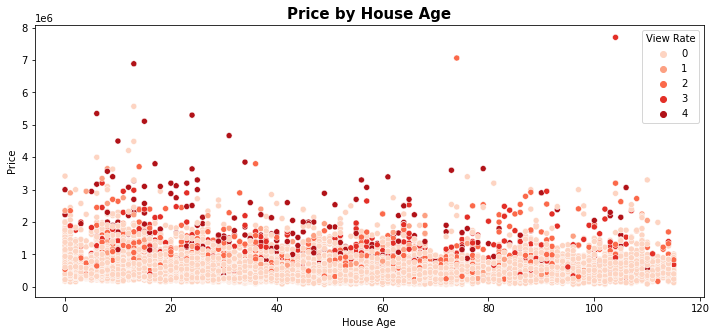

In [22]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = 'house_age', y = 'price', hue = 'view', palette = sns.color_palette('Reds',n_colors = 5))
plt.title("Price by House Age", fontsize = 15, fontweight='bold')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.legend(title = 'View Rate')


### House Price Distribution by Grade Level

As displayed in the plot below, house prices are more spread out for houses with better grades, which also means houses with better grades often have higher prices. This is logical, considering houses with higher grades may offer better investment potential, as they tend to retain their value more effectively over time. Buyers may be willing to pay a premium for a property with a higher grade, anticipating future appreciation and resale value.

Text(0.5, 1.0, 'House Price Distribution by Grade Level')

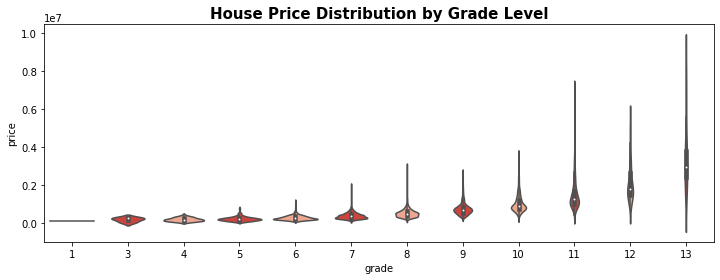

In [23]:
plt.figure(figsize = (12,4))
sns.violinplot(data = df,x = 'grade' ,y ='price' , palette = sns.color_palette('Reds', n_colors = 2))
plt.title('House Price Distribution by Grade Level', fontsize = 15, fontweight='bold')

## 4.2 Outliers and Linearity

[Back to Top](#1.5-Table-of-Contents)

As shown in the results below, there appears to have some outliers, e.g.: the max number of bedrooms is 33.

In [24]:
df.drop('id', axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,2.160100e+04,21601.000000,21601.000000,21601.000000,2.160100e+04,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000
mean,5.401295e+05,3.370909,2.114590,2079.835332,1.511319e+04,1.493866,0.007546,0.234341,3.409657,7.656405,1788.339799,291.495533,1970.980695,98077.916208,47.560008,-122.213844,1986.674645,12772.457664,43.342438,0.042313
std,3.672153e+05,0.929812,0.770069,918.264931,4.143112e+04,0.539673,0.086541,0.766418,0.650852,1.175361,828.039834,442.599587,29.363254,53.502977,0.138582,0.140843,685.490759,27311.041452,29.365068,0.201307
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571700,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10086.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

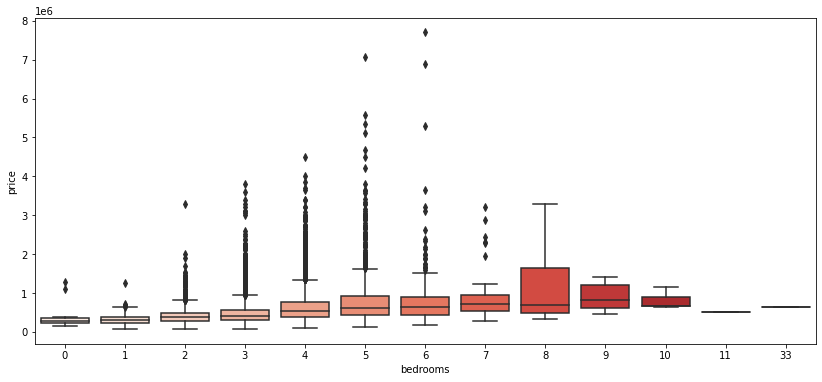

In [25]:
plt.figure(figsize = (14,6))
sns.boxplot(x ='bedrooms' , y='price' , data =df, palette = sns.color_palette('Reds', n_colors = 13))

Then, we look at the distribution of number of bedrooms. Most houses have number of bedrooms of 10 or less.

Next, we will observe the linear relationship between Price and predictors. Since outliers in bedrooms variable do not affect the skewness of the data and the regression line, we do not need to remove these points for now.

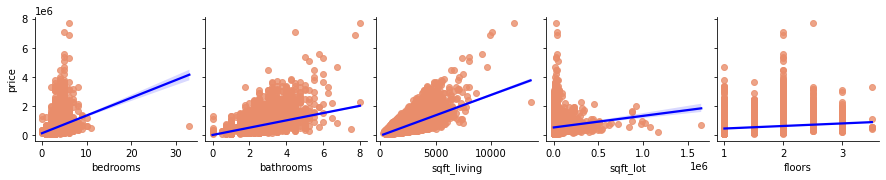

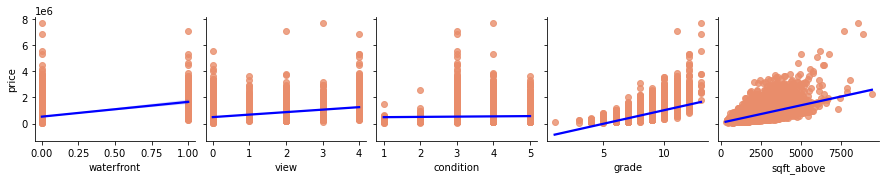

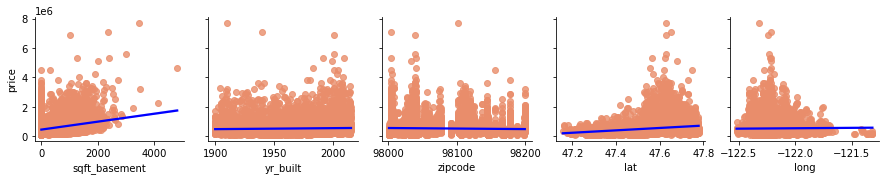

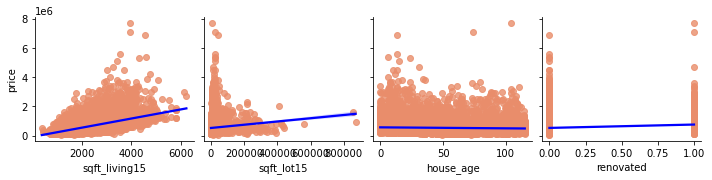

In [26]:
# Illustrate linear relationship with price column (target variable)
sns.set_palette("flare")
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors'], kind="reg", plot_kws={'line_kws':{'color':'blue'}})
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['waterfront', 'view', 'condition', 'grade', 'sqft_above'], kind="reg", plot_kws={'line_kws':{'color':'blue'}})
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['sqft_basement','yr_built', 'zipcode', 'lat', 'long'], kind="reg", plot_kws={'line_kws':{'color':'blue'}})
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['sqft_living15', 'sqft_lot15','house_age', 'renovated'], kind="reg", plot_kws={'line_kws':{'color':'blue'}})


It can be seen that the features having a strong linear relationship with Price are: Bathrooms, Sqft_Living, Grade, Sqft_Above, Sqft_Basement and Sqft_Living15.

Conversely, the variables that have a weak linear relationship with Price are: Condition, Yr_Built, Zipcode, Lat, Long, House_Age

Since Zipcode is a categorical variable, we will check the number of zipcodes in this dataset before deciding whether to drop it or to perform data encoding (e.g.: One Hot Encoding). If there are too many zipcodes, we will remove this variable to avoid the overfitting problem.

There are a total of 70 zipcodes for 21,601 houses. Keeping zipcodes can have benefits for expanding the dataset, such as adding more data about population demography, distance from services, number of services, etc. by zipcode. However, whether or not to use zipcode in predictive models is still a debate. In the scope of this project, we will remove this variable.

In [27]:
df['zipcode'].value_counts().sort_index()

98001    362
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    316
Name: zipcode, Length: 70, dtype: int64

The columns will be removed due to their weak linear relationship with price are Date, Latitude, Longitude, Zipcode, Condition, Year Built, and House Age.

In [28]:
# Remove columns having weak linear relationship with price
df.drop(['date', 'lat', 'long', 'zipcode', 'condition', 'yr_built', 'house_age'], axis=1, inplace=True)

In [29]:
df = df.reset_index(drop=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## 4.3 Correlation and Multicollinearity

[Back to Top](#1.5-Table-of-Contents)

First, we will check the correlation between the target variable (Price) and other features to identify relevant features and help in feature selection.

Correlation analysis helps identify which features are most strongly associated with the target variable. Features with high correlation coefficients are more likely to be relevant predictors of the target, while those with low correlations may be less informative.

Then, we will verify whether the multicollinearity exists by detecting highly correlated independant variables (predictors). 

It's important to avoid multicollinearity because multicollinearity can make it difficult to interpret the coefficients of the regression model. When independent variables are highly correlated, it becomes challenging to disentangle their individual effects on the dependent variable. For example, we want to see how the house prices differ by number of bedrooms. We won't be able to see that clearly in our model if the number of bedrooms and living square footage of the house are highly correlated. It could be either one of those 2 independant variables leading to higher / lower house prices.

### Correlation

In [30]:
# Correlation between Price and other features
corr = df.corr().round(2)
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovated
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.67,0.61,0.32,0.59,0.08,0.13
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.36,0.48,0.30,0.39,0.03,0.02
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,0.66,0.69,0.28,0.57,0.09,0.05
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.76,0.88,0.43,0.76,0.18,0.06
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.07,0.11,0.18,0.02,0.14,0.72,0.01
floors,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,0.46,0.52,-0.25,0.28,-0.01,0.01
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.08,0.07,0.08,0.09,0.03,0.09
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.25,0.17,0.28,0.28,0.07,0.10
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,1.00,0.76,0.17,0.71,0.12,0.01
sqft_above,0.61,0.48,0.69,0.88,0.18,0.52,0.07,0.17,0.76,1.00,-0.05,0.73,0.19,0.02


<AxesSubplot:>

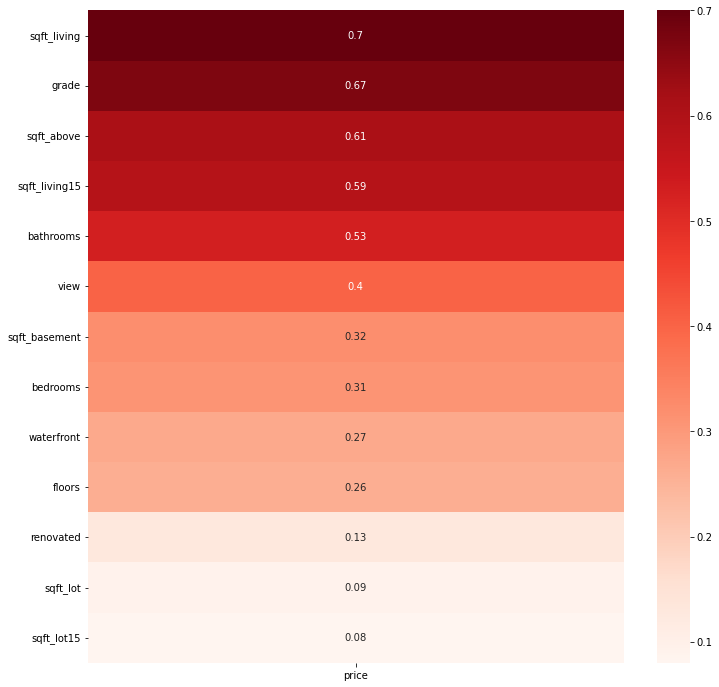

In [31]:
# Correlation heatmap visualization
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr[['price']].drop('price').sort_values(by='price', ascending=False), annot=True, ax=ax, cmap='Reds')

From this correlation heatmap visualization, the top features correlated with Price are Sqft_living, Grade, and Sqft_above. This result corresponds to the plots in the data visualizations section above.

### Multicollinearity

To identify potential multicollinearity, we will review the correlation matrix for the predictor variables (independant variables). In general, a correlation coefficient with an absolute value > 0.7 among 2 predictors typically indicates the presence of multicollinearity. Removing some redundant predictors that are highly correlated can help reduce multicollinearity within our training data, improving the stability of the resulting model.

In [32]:
# Correlation between independant variables only (exclude price)
corr_ind = df.drop('price', axis=1).corr().round(2)

<AxesSubplot:>

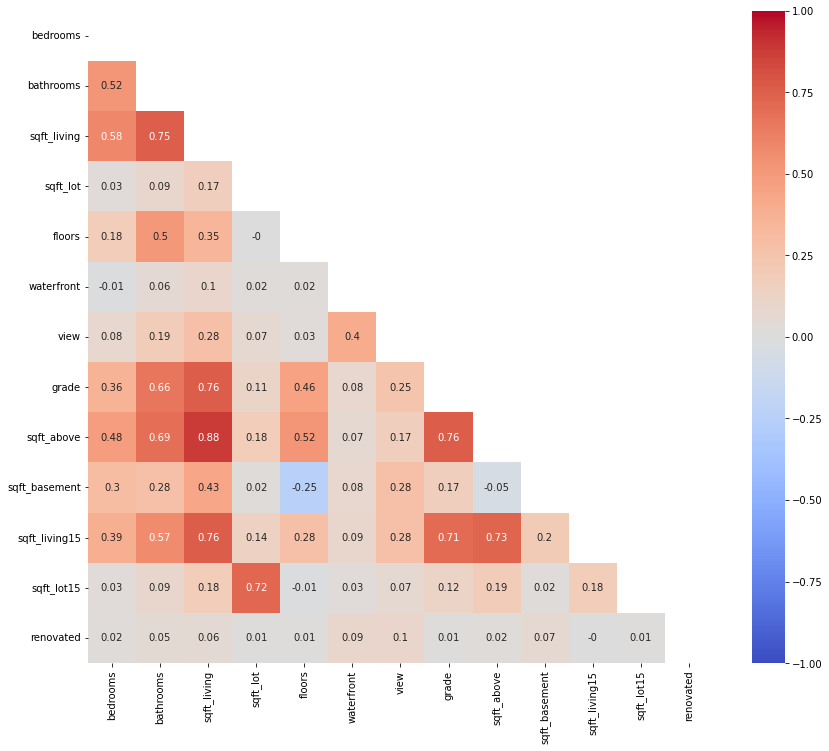

In [33]:
# Create heatmap correlation matrix
# Mask the upper part
mask = np.zeros_like(corr_ind)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,12))
sns.heatmap(corr_ind, annot=True, cmap='coolwarm', vmin=-1, vmax=1,mask=mask)


<AxesSubplot:>

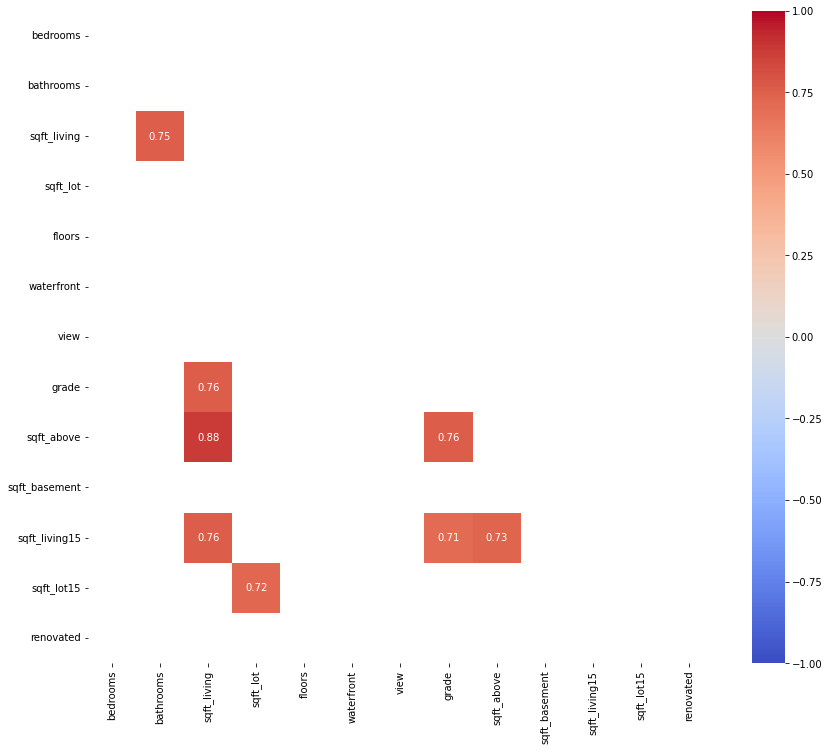

In [34]:
# Filter out correlation pairs higher than 0.7
plt.figure(figsize=(14,12))
sns.heatmap(corr_ind[corr_ind >= 0.7], annot=True, cmap='coolwarm', vmin=-1, vmax=1,mask=mask)


After filtering, we can see that there are strong correlations between:
- Sqft_living vs Bathrooms
- Sqft_living vs Grade
- Sqft_living vs Sqft_above
- Sqft_above vs Grade

Before dropping these variables, we will implement another method, VIF (Variance Inflation Factor), to determine the strength of their correlation to avoid leaving out important data and affecting the reliability of the model.

In [35]:
def compute_vif(considered_features):
    
    X = df[considered_features]
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create a dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# Features to consider removing
considered_features = ['bathrooms', 'sqft_living', 'sqft_living15','sqft_lot', 'sqft_lot15', 'sqft_above', 'grade']

# Compute VIF
compute_vif(considered_features).sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,sqft_living,6.088694
1,sqft_above,4.817012
2,grade,2.959103
3,sqft_living15,2.698344
4,bathrooms,2.459975
5,sqft_lot15,2.103928
6,sqft_lot,2.081195


A VIF of 1 indicates that the feature has no correlation with any of the other features. Features having VIF greater than or equal to 5 are highly correlated with other features. Here, only Sqft_living has VIF value exceeding 5. We will drop this variable to address the issue of multicollinearity since Sqft_living15 (a more updated variable), along with Sqft_above and Sqft_basement, can cover Sqft_living.

Same as Sqft_living, as we already have Sqft_lot15, we will remove Sqft_lot.

Although in the heatmap, Sqft_above and Grade are highly correlated, their VIFs are less than 5 and these two variables have a strong relationship with Price as observed from the visualizations section above, so we will keep them in our dataset.

Now let's check VIF values and correlation heatmap again after removing Sqft_living and Sqft_lot variables.

In [36]:
# Compute VIF after removing sqft_living and sqft_lot from considered features
considered_features.remove('sqft_living')
considered_features.remove('sqft_lot')
compute_vif(considered_features).sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,sqft_above,3.238295
1,grade,2.917431
2,sqft_living15,2.492111
3,bathrooms,2.091108
4,sqft_lot15,1.051447


In [37]:
# Remove sqft_living, sqft_lot from dataframe to avoid multicollinearity
df.drop(columns = ['sqft_living', 'sqft_lot'], axis=1, inplace=True)

<AxesSubplot:>

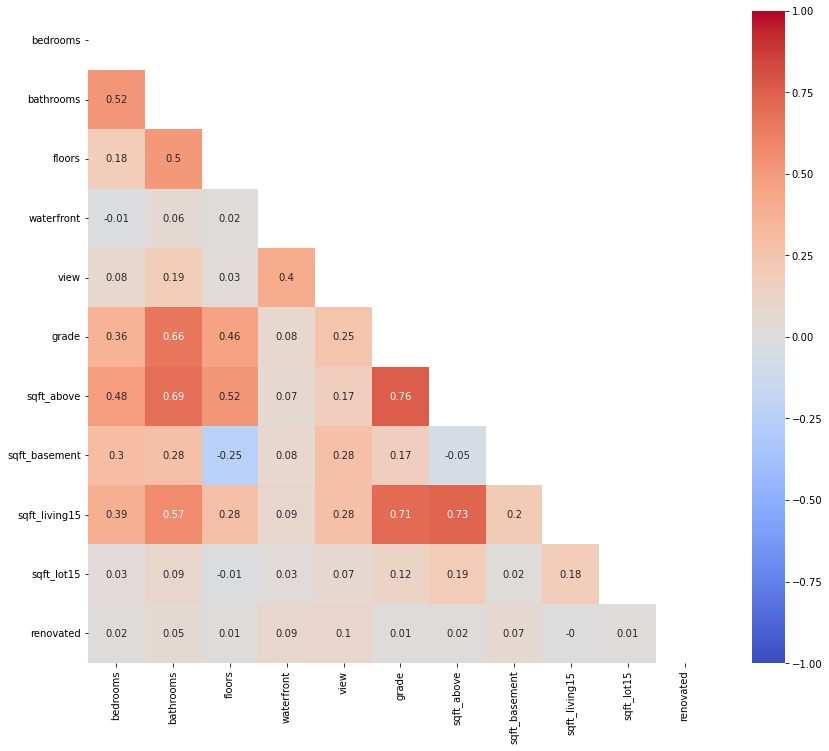

In [38]:
# Heatmap correlation matrix after removing sqft_living
corr_ind = df.drop('price', axis=1).corr().round(2)

mask = np.zeros_like(corr_ind)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,12))
sns.heatmap(corr_ind, annot=True, cmap='coolwarm', vmin=-1, vmax=1,mask=mask)

## 4.4 Data Scaling

[Back to Top](#1.5-Table-of-Contents)

Data scaling, or normalization, is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. [-1;1]. This is typically done to ensure that all features contribute equally to the analysis and to improve the performance of machine learning algorithms.

We will implement the Standard Scaler technique, that scales numerical features to have a mean of 0 and a standard deviation of 1.

In [39]:
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
df_scaled.columns = df.columns
df_scaled

,price,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovated
0,-0.866622,-0.398917,-1.447423,-0.915142,-0.087197,-0.305768,-0.558484,-0.734692,-0.658614,-0.943397,-0.260796,-0.210196
1,-0.005799,-0.398917,0.175846,0.937875,-0.087197,-0.305768,-0.558484,0.460931,0.245158,-0.432802,-0.187967,4.757466
2,-0.980727,-1.474428,-1.447423,-0.915142,-0.087197,-0.305768,-1.409306,-1.229848,-0.658614,1.069806,-0.172478,-0.210196
3,0.173936,0.676595,1.149808,-0.915142,-0.087197,-0.305768,-0.558484,-0.891692,1.397468,-0.914220,-0.284597,-0.210196
4,-0.082050,-0.398917,-0.148808,-0.915142,-0.087197,-0.305768,0.292338,-0.130842,-0.658614,-0.272329,-0.192947,-0.210196
...,...,...,...,...,...,...,...,...,...,...,...,...
21596,-0.490540,-0.398917,0.500500,2.790891,-0.087197,-0.305768,0.292338,-0.311997,-0.658614,-0.666216,-0.412424,-0.210196
21597,-0.381609,0.676595,0.500500,0.937875,-0.087197,-0.305768,0.292338,0.630009,-0.658614,-0.228564,-0.204042,-0.210196
21598,-0.375888,-1.474428,-1.772077,0.937875,-0.087197,-0.305768,-0.558484,-0.927923,-0.658614,-1.410226,-0.394189,-0.210196
21599,-0.381609,-0.398917,0.500500,0.937875,-0.087197,-0.305768,0.292338,-0.227458,-0.658614,-0.841278,-0.420552,-0.210196


----

# 5. Feature Engineering

[Back to Top](#1.5-Table-of-Contents)

In this process, we are going to define the X variable (independant variables) and Y (target variable = Price).

Then, we will use them to split the data into a training set and a test set.

## Feature Selection & Data Split

In [40]:
X_var = df_scaled[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade',
                 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'renovated']].values
y_var = df_scaled['price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples: ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples: ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples: ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples: ', attrs = ['bold']), y_test[0:5])


X_train samples:  [[-1.47442795 -1.44742337  0.01136636 -0.08719703 -0.30576842 -1.40930564
  -0.62599863 -0.65861399 -0.33068264 -0.13447099 -0.21019595]
 [-0.39891658 -0.47346172 -0.91514182 -0.08719703 -0.30576842  0.29233836
  -0.58976765  0.85520466  0.74886092 -0.15468306 -0.21019595]
 [-0.39891658  0.82515381 -0.91514182 -0.08719703 -0.30576842 -0.55848364
  -0.74676856  0.65185589 -0.25774051 -0.14692045 -0.21019595]
 [ 0.67659479 -0.14880784  0.01136636 -0.08719703 -0.30576842 -0.55848364
  -0.50522869 -0.65861399 -0.91421969 -0.13813259 -0.21019595]
 [-0.39891658  0.50049993 -0.91514182 -0.08719703 -0.30576842 -0.55848364
  -1.16946332  0.67445019 -0.84127756 -0.32073696 -0.21019595]]
X_test samples:  [[ 0.67659479  0.50049993 -0.91514182 -0.08719703 -0.30576842 -0.55848364
  -0.54145967  1.39746806 -0.65162802 -0.18199865 -0.21019595]
 [-0.39891658 -0.14880784 -0.91514182 -0.08719703 -0.30576842 -1.40930564
  -0.28784281 -0.65861399 -0.6953933   1.0488141  -0.21019595]
 [-0.

----

# 6. Modeling

[Back to Top](#1.5-Table-of-Contents)

We will build and train 5 different linear regression models: Ordinary Least Squares (OLS), Ridge Regression, Lasso Regression, Bayesian Regression, and Elastic Net Regression.

For each model, we will first define a variable to store the model algorithm. Then, we will fit the training set data into the model. Finally, we will make predictions using the test set.

### OLS

In [41]:
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

### Ridge

In [42]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

### Lasso

In [43]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

### Bayesian

In [44]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

### ElasticNet

In [45]:
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

----

# 7. Model Evaluation

[Back to Top](#1.5-Table-of-Contents)

To evaluate the performance of our models, we will use two evaluation metrics: Explained Variance Score and R-squared Score. They measure the proportion of variance in the target variable that is explained by the regression model.

The Explained Variance Score ranges from 0 to 1, with higher values indicating that the model's predictions explain a larger proportion of the variance in the target variable. Like the Explained Variance Score, the R-Squared Score ranges from 0 to 1, with higher values indicating better model performance.

The ideal score for these 2 metrics should be between 0.6 and 1.0.

## 7.1 Explained Variance Score

In [46]:
# Explained Variance Score
print(cl('EXPLAINED VARIANCE SCORE: ', attrs = ['bold']))
print(cl('OLS model: {}'.format(evs(y_test, ols_yhat))))
print(cl('Ridge model: {}'.format(evs(y_test, ridge_yhat))))
print(cl('Lasso model: {}'.format(evs(y_test, lasso_yhat))))
print(cl('Bayesian model: {}'.format(evs(y_test, bayesian_yhat))))
print(cl('ElasticNet model: {}'.format(evs(y_test, en_yhat))))

EXPLAINED VARIANCE SCORE: 
OLS model: 0.6108348322955329
Ridge model: 0.6108359229518261
Lasso model: 0.6090632399966541
Bayesian model: 0.610858060202221
ElasticNet model: 0.6103933347686628


## 7.2 R-Squared

In [47]:
# R-squared using sklearn (on test set)
print(cl('R-SQUARED: ', attrs = ['bold']))
print(cl('OLS model: {}'.format(r2(y_test, ols_yhat))))
print(cl('Ridge model: {}'.format(r2(y_test, ridge_yhat))))
print(cl('Lasso model: {}'.format(r2(y_test, lasso_yhat))))
print(cl('Bayesian model: {}'.format(r2(y_test, bayesian_yhat))))
print(cl('ElasticNet model: {}'.format(r2(y_test, en_yhat))))

R-SQUARED: 
OLS model: 0.6108315048264686
Ridge model: 0.6108325927972964
Lasso model: 0.6090557318228831
Bayesian model: 0.6108546740412696
ElasticNet model: 0.6103875808735182


As demonstrated in the above results, the Explained Variance Scores and R-Squared Scores of all models are above 0.6, meaning that these models are suitable for the given dataset. The models with the highest explained variance and r-squared scores are: Bayesian, Ridge and OLS. However, the scores of these models do not differ significantly from those of other models.

Next, let's look at the summary for the OLS model using statsmodels instead of scikit-learn and on the training set instead of the test set to verify the risk of overfitting as well as identify the features having the biggest impact on price.

In [48]:
# OLS Model Summary using statsmodels (on training set)
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2378.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:33:58   Log-Likelihood:                -16624.
No. Observations:               17280   AIC:                         3.327e+04
Df Residuals:                   17268   BIC:                         3.337e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.005     -0.074      0.941      -0.010       0.009
x1            -0.0754      0.006    -12.449      0.000      -0.087      -0.063
x2            -0.0487      0.008     -5.907      0.000      -0.065      -0.033
x3            -0.0195      0.007     -2.955      0.003      -0.032      -0.007
x4             0.1263      0.005     23.697      0.000       0.116       0.137
x5             0.1306      0.006     22.956      0.000       0.119       0.142
x6             0.3242      0.009     38.032      0.000       0.308       0.341
x7             0.4207      0.010     40.093      0.000       0.400       0.441
x8             0.2734      0.007     41.175      0.000       0.260       0.286
x9             0.0172      0.008      2.148      0.032       0.002       0.033
x10           -0.0503      0.005    -10.263      0.000      -0.060      -0.041
x11            0.0664      0.005     13.803      0.000       0.057       0.076
==============================================================================
Omnibus:                    13179.126   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           905145.550
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      37.912   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As outlined in the preceding summary, there is a minor discrepancy between R-squared calculated on test set (0.611) vs on training set (0.602). Since R-squared in the test set is not significantly higher than R-squared in the training set, there is no sign of overfitting on the training data.

It's apparent that the F-statistic is much greater than 1. It means that these predictors are significant to the model: there is a strong relationship between these independant variables and price.

Moreover, we consider the p-value of each predictor to determine if they are relevant to the model. It's noticeable that only Sqft_Living15 (x9) has a p-value slightly > 0, therefore it is not statistically significant. Removing that predictor would reduce the R-squared value, but we might make better predictions.

Additionally, Sqft_above (x7), Grade (x6), Sqft_basement (x8) have the highest positive coefficients. Thus, these are the features that have the strongest influence on home prices.

----

# 8. Conclusion

[Back to Top](#1.5-Table-of-Contents)

Through not only exploration of properties characteristics and price data, but also building models to predict house prices, we have uncovered some interesting insights:
- House buying and selling transactions are carried out mainly during the week.
- The months with the highest sales volume are during the summer, during school breaks.
- Houses with better views typically have higher selling prices.
- The most important features for the sales price are the Area Above Ground Level Square Footage, Grade, and Basement Size of the house. The higher these parameters, the more expensive the houses are.
- The most suitable regression models for our dataset are Bayesian, Ridge, and OLS.

### Project Limitations

As mentioned in the introduction, there are many other factors affecting house prices that are not included in this dataset: from the housing market (such as the overall health of the economy, interest rates, legislation, etc.), to house characteristics like locations (for example: on a highly desirable street, in good school districts), car garage / parking spot, etc. 

Moreover, linear regression methods considered in this project are the most popular ones. However, there are many other machine learning models including Decision Tree, Boosted Decision Tree, Poisson Regression, etc.

### Project Extension Ideas

Potential ideas that can be considered to expand this project:
- Expand this research by adding new data, for example about neighborhood or car garage / parking spot availability.
- Apply other modeling techniques and compare with our existing models.

### References

[[1]](#House-Sales-By-Month-&-By-Week-Day) Studies on seasonality in real estate: https://www.movinglabor.com/blog/when-is-peak-moving-season

[[2]](#House-Price-By-House-Age) Research on the impact of views on Seattle house prices: https://www.nerdwallet.com/article/mortgages/how-much-does-a-view-affect-a-homes-value